# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [20]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

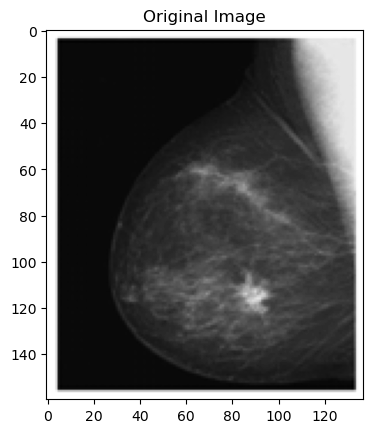

In [22]:
img1 = rgb2gray(rgba2rgb(io.imread("imgs/Picture1.png")))
show_images([img1],["Original Image"])

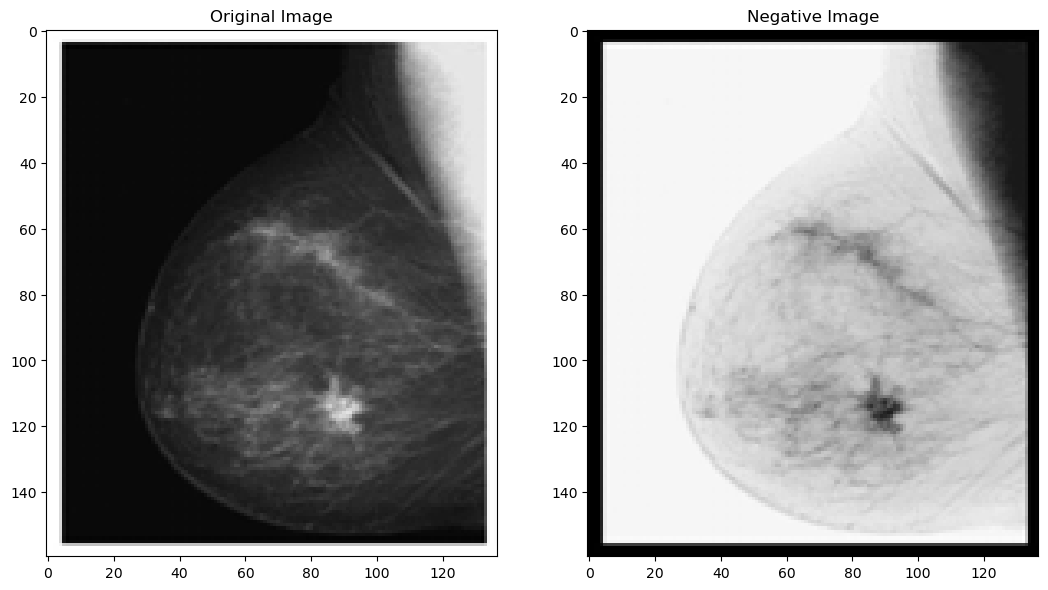

In [23]:
'''
1
Negative Transformation
'''
def negative_transform(image):
    transformed_image = 255-image
    return transformed_image

neg_img1= negative_transform(img1)

show_images([img1,neg_img1],["Original Image","Negative Image"])


[[254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 255 254 254]
 ...
 [254 254 255 ... 167 255 255]
 [254 254 254 ... 233 254 254]
 [254 254 254 ... 255 254 254]]


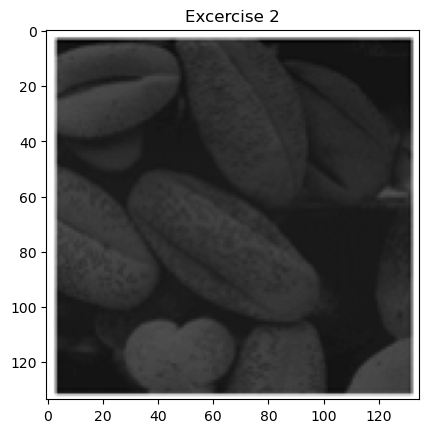

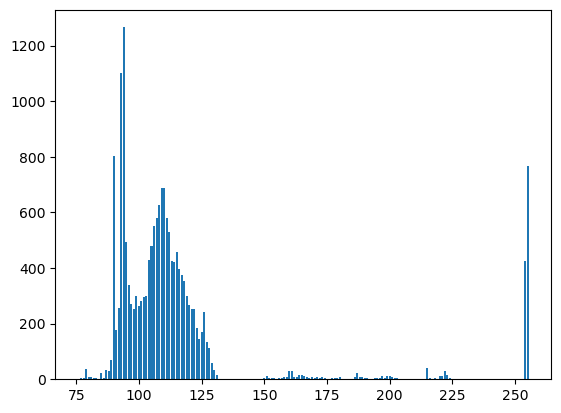

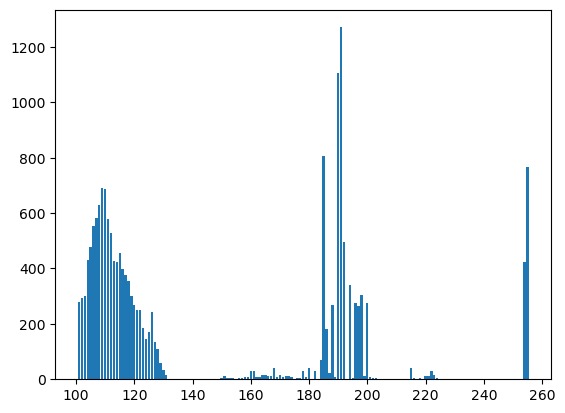

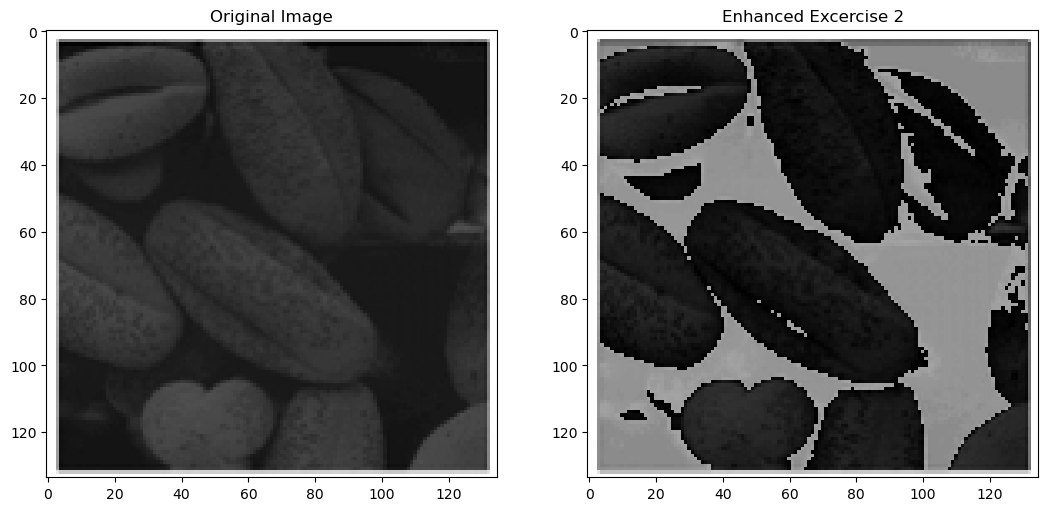

In [24]:
'''
2
Contrast Enhancement
'''
img2 = np.round(rgb2gray(rgba2rgb(io.imread("imgs/Picture2.png")))*255).astype(np.uint8)
print(img2)
show_images([img2],["Excercise 2"])
# print(histogram(img2,nbins=256))
showHist(img2)

def contrast_enhance(img):
    enhanced_img = np.copy(img)
    enhanced_img[enhanced_img <=100] = np.round(1.5*enhanced_img[enhanced_img <=100]+50)
    return enhanced_img

enhanced_img2 = contrast_enhance(img2)
showHist(enhanced_img2)
show_images([img2,enhanced_img2],["Original Image","Enhanced Excercise 2"])

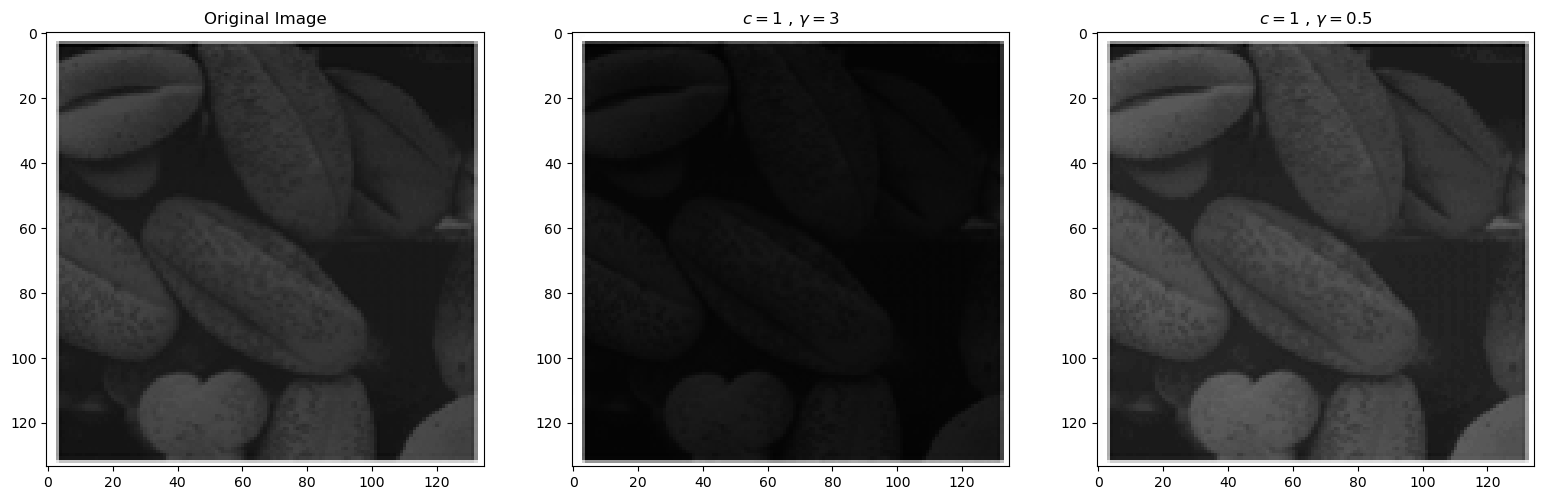

In [25]:
'''
3
Gamma Correction
'''

def gamma_correction(img,c,gamma):
    corrected_img = np.copy(img) / 255
    corrected_img = c * (corrected_img**gamma)
    return np.round(255*corrected_img)
consts = [1,1,1]
gammas= [1,3,0.5]
titles = ["Original Image", *[fr"$c={consts[i]}$ , $\gamma = {gammas[i]}$"
                              for i in range(1,len(consts))]]
imgs = []
for i in range(3):
    imgs.append(gamma_correction(img2,consts[i],gammas[i]))
show_images(imgs,titles)

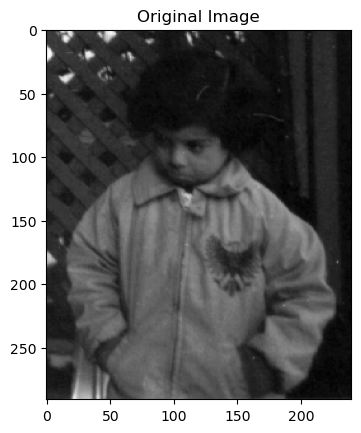

(array([   2,   38,    0,  389, 1245,    0, 1518,    0, 3628, 3146, 2041,
          0, 1601, 2415,    0, 1684,    0, 1506,    0, 1813, 1660, 1390,
          0, 1572, 2662, 1761,    0, 1387, 1218, 1287,    0, 1308, 1288,
       1068,  732,  639,  559,    0,  575,  504,  502,    0,  518,  476,
          0,  490,  599, 1263,  686,  708,    0,  724,  804,  957, 2770,
          0, 1200,  973, 1004, 2434, 1087,    0,  892, 1737,  995,  813,
          0,    0, 1459,  723,  576,  512,  448,  431,  377,  600,  296,
        266,    0,  354,  154,  121,  113,  113,   91,  163,   58,   53,
         50,   51,   67,    0,   20,   21,    0,   36,   10,   12,   24,
          0,   13,   30,    6,   13,   11,   11,    9,    9,    9,    0,
         19,   13,   16,    6,    0,   18,    6,    0,    5,    7,    6,
          6,    8,   11,    0,    9,    9,    3,    8,    0,    9,    7,
          9,    7,    4,    5,   17,    4,    6,    4,   11,    7,    0,
          0,    2,    6,    2,    8,    0,    2,  

In [42]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(name,ext,nbins=256):
    pass
    
pout_img = io.imread("imgs/pout.tif")
show_images([pout_img],["Original Image"])
hist_pout_img = histogram(pout_img,nbins=256)
print(hist_pout_img)

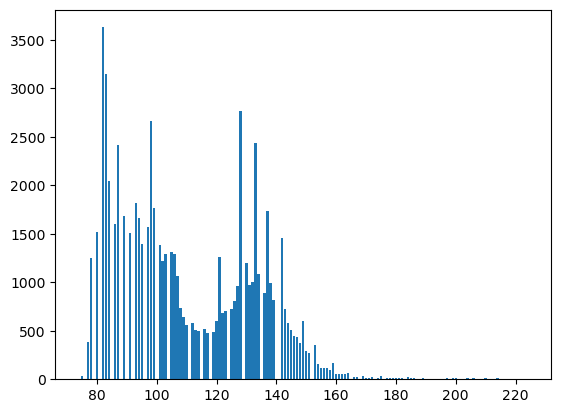

In [29]:
showHist(pout_img)

(291, 240)


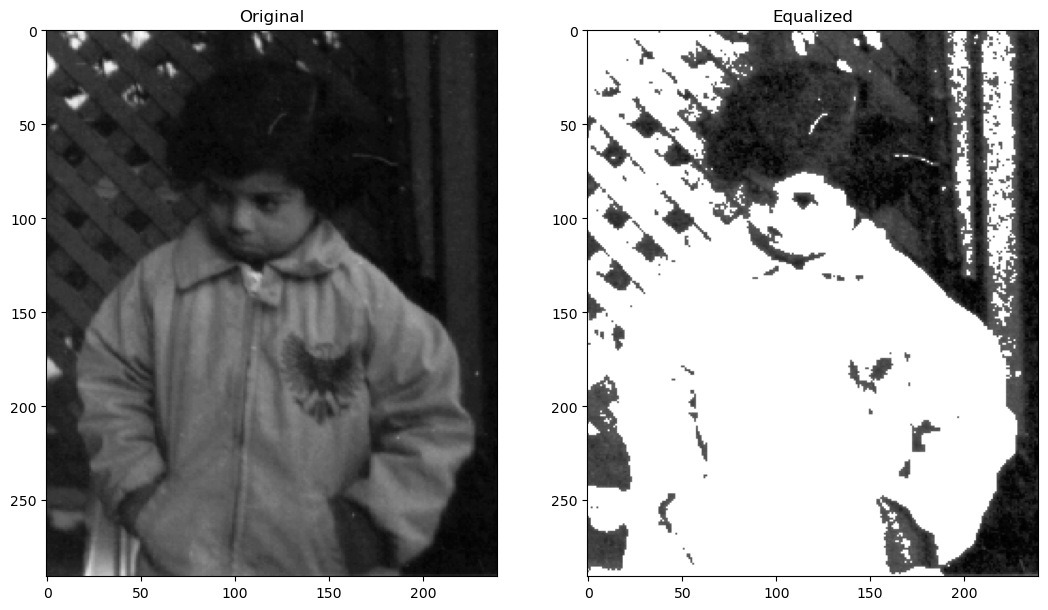

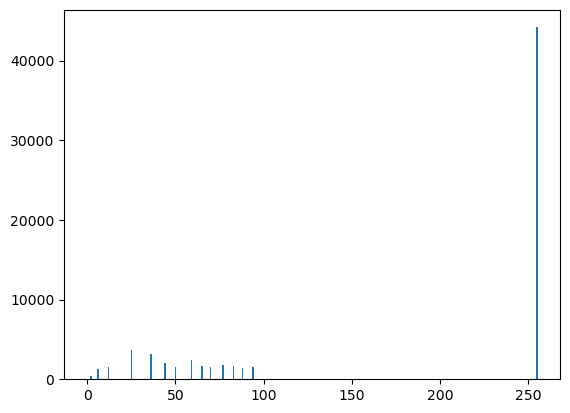

In [64]:
def histogram_equalize(img):
    hist_pout_img = histogram(img,nbins=256)
    freqs = np.zeros(256,dtype=np.int64)
    for i in range(len(hist_pout_img[0])):
        freqs[hist_pout_img[1][i]] = hist_pout_img[0][i]
    freqs = np.cumsum(freqs)
    NM = pout_img.shape[0]*pout_img.shape[1]
    freqs = freqs / NM
    mapped_p = np.copy(freqs)
    mapped_p = np.round(255*mapped_p).astype(np.uint8)
    equalized_img = np.copy(img)
    for i in range(256):
        equalized_img[equalized_img == i] = mapped_p[i]
    return equalized_img

print(pout_img.shape)
equalized_pout_img = histogram_equalize(pout_img)
show_images([pout_img,equalized_pout_img],["Original","Equalized"])
showHist(equalized_pout_img)